## **Exercise 6.1** Nitrate concentration

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp

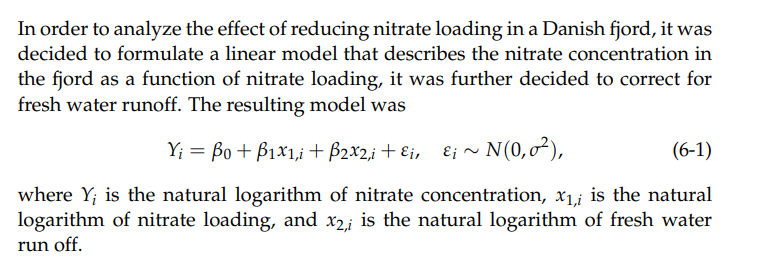

### **a)** Which of the following statements are assumed fulfilled in the usual multiple linear regression model?

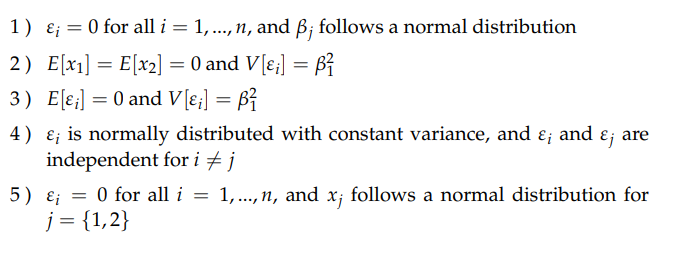

---

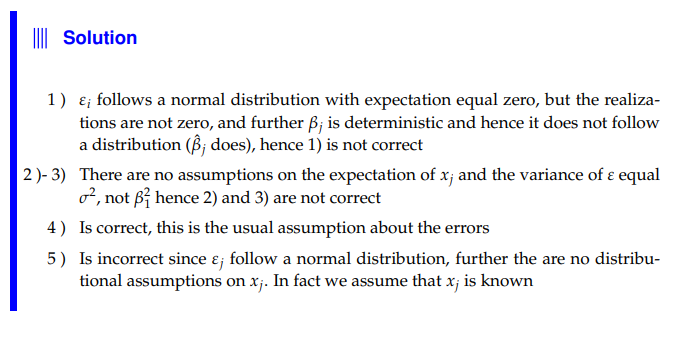

* Hence **4** is correct

### The parameters in the model were estimated in Python and the following results are available (slightly modified output from summary):

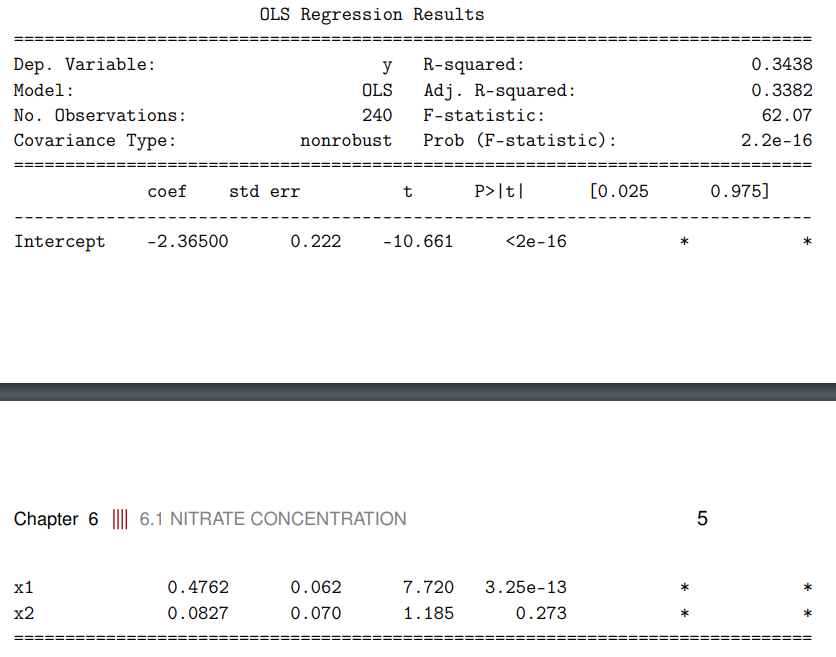

### **b)** What are the parameter estimates for the model parameters, $βˆi$ and $σˆ2$, and how many degrees of freedom are there in the estimation?

---



##### The number of degrees of freedom is equal n − (p + 1), and since the number of
##### observations is n = 240 and p = 2, we get **df = 240 − (2 + 1) = 237.**

##### Furtheremore we can see from the table that:

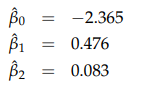

##### and the estimated error variance  is $$σˆ2 = 0.30642.$$ and can be found by np.sqrt(fit.mse_resid)


### **c)** Calculate the usual 95% confidence intervals for the parameters (β0, β1, and β2).

---

The confidence intervals can be calculated by:

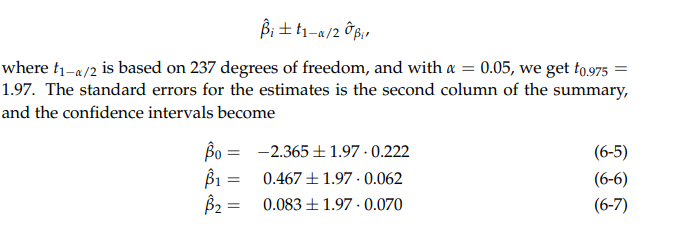


In [9]:
print(1-0.05/2)
print(0.975*237)



# Define confidence level and degrees of freedom
confidence_level = 0.95
degrees_of_freedom = 237

# Calculate the t critical value for a two-tailed test
t_critical = stats.t.ppf(1 - (1 - confidence_level) / 2, degrees_of_freedom)

print("Critical t-value:", t_critical)


0.975
231.075
Critical t-value: 1.970024010402567


then we have 1.97

### **d)** On level α = 0.05 which of the parameters are significantly different from 0, also find the p-values for the tests used for each of the parameters?

---

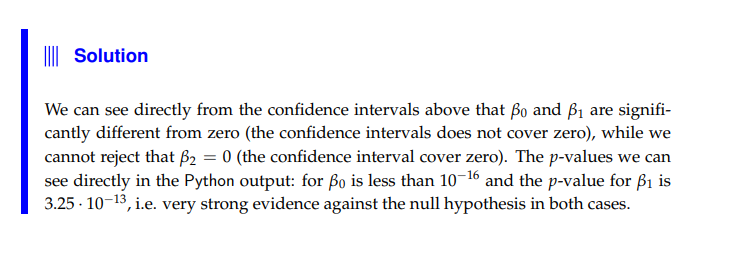

---

## **Exercise 6.2** Multiple linear regression model

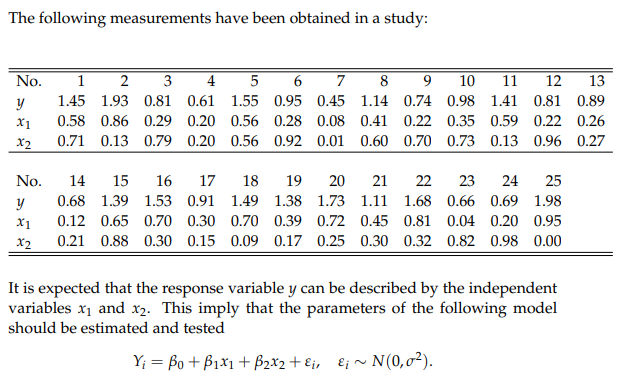

### **a)** Calculate the parameter estimates (βˆ0, βˆ1, βˆ2, and σˆ2), in addition find the usual 95% confidence intervals for β0, β1, and β2. You can copy the following lines to Python to load the data:

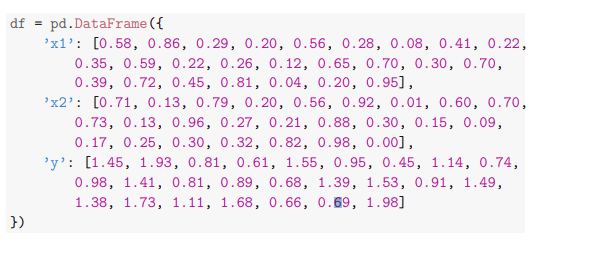

---

In [10]:
df = pd.DataFrame({
'x1': [0.58, 0.86, 0.29, 0.20, 0.56, 0.28, 0.08, 0.41, 0.22,
0.35, 0.59, 0.22, 0.26, 0.12, 0.65, 0.70, 0.30, 0.70,
0.39, 0.72, 0.45, 0.81, 0.04, 0.20, 0.95],
'x2': [0.71, 0.13, 0.79, 0.20, 0.56, 0.92, 0.01, 0.60, 0.70,
0.73, 0.13, 0.96, 0.27, 0.21, 0.88, 0.30, 0.15, 0.09,
0.17, 0.25, 0.30, 0.32, 0.82, 0.98, 0.00],
'y': [1.45, 1.93, 0.81, 0.61, 1.55, 0.95, 0.45, 1.14, 0.74,
0.98, 1.41, 0.81, 0.89, 0.68, 1.39, 1.53, 0.91, 1.49,
1.38, 1.73, 1.11, 1.68, 0.66, 0.69, 1.98]
})

In [11]:
fit = smf.ols(formula = 'y ~ x1 + x2', data=df).fit()
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
No. Observations:                  25   F-statistic:                     172.0
Covariance Type:            nonrobust   Prob (F-statistic):           3.70e-14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4335      0.066      6.571      0.000       0.297       0.570
x1             1.6530      0.095     17.355      0.000       1.455       1.851
x2             0.0039      0.075      0.053      0.958      -0.151       0.159

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [12]:
sigma = np.sqrt(fit.mse_resid) # fit.mse_resid or fit.scale
print(sigma)

0.11271746832914661


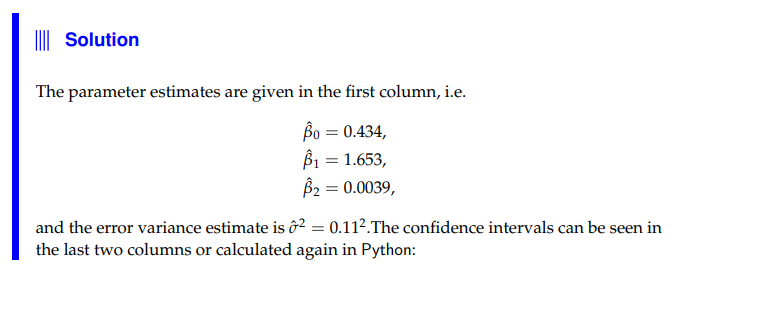

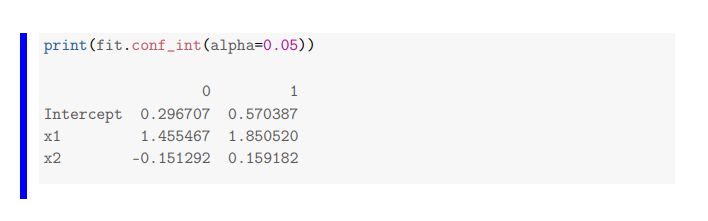

### **b)** Still using confidence level α = 0.05 reduce the model if appropriate.

---

In [13]:
fit = smf.ols(formula = 'y ~ x1', data=df).fit()
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
No. Observations:                  25   F-statistic:                     359.6
Covariance Type:            nonrobust   Prob (F-statistic):           1.54e-15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4361      0.044      9.913      0.000       0.345       0.527
x1             1.6512      0.087     18.963      0.000       1.471       1.831

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


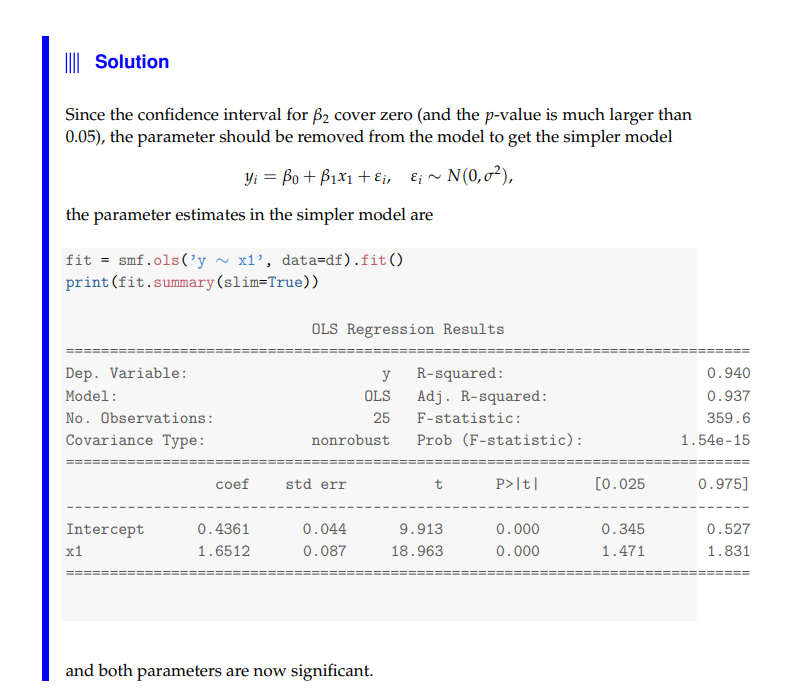

### **c)** Carry out a residual analysis to check that the model assumptions are fulfilled.

---

#### We are interested in inspecting a q-q plot of the residuals and a plot of the residuals as a function of the fitted values


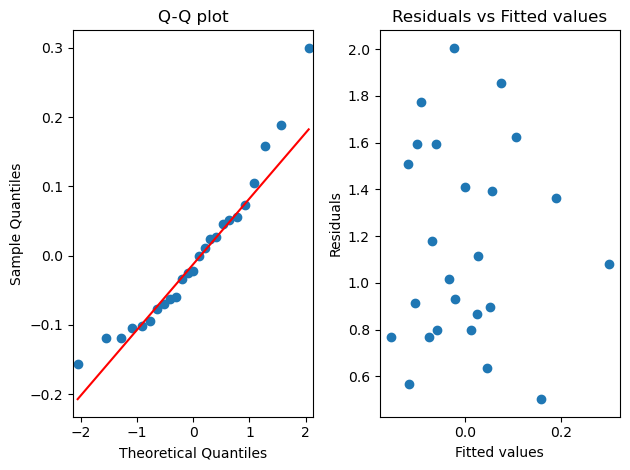

In [14]:
fig, ax = plt.subplots(1,2)
sm.qqplot(fit.resid, line="q",a=1/2, ax=ax[0])
ax[0].set_title("Q-Q plot")
ax[1].scatter(fit.resid, fit.fittedvalues)
ax[1].set_xlabel("Fitted values")
ax[1].set_ylabel("Residuals")
ax[1].set_title("Residuals vs Fitted values")
plt.tight_layout()
plt.show()

#### there are no strong evidence against the assumptions, the qq-plot is are a straight line and the are no obvious dependence between the residuals and the fitted values, and we conclude that the assumptions are fulfilled.

### **d)** Make a plot of the fitted line and 95% confidence and prediction intervals of the line for x1 ∈ [0, 1] (it is assumed that the model was reduced above).

---

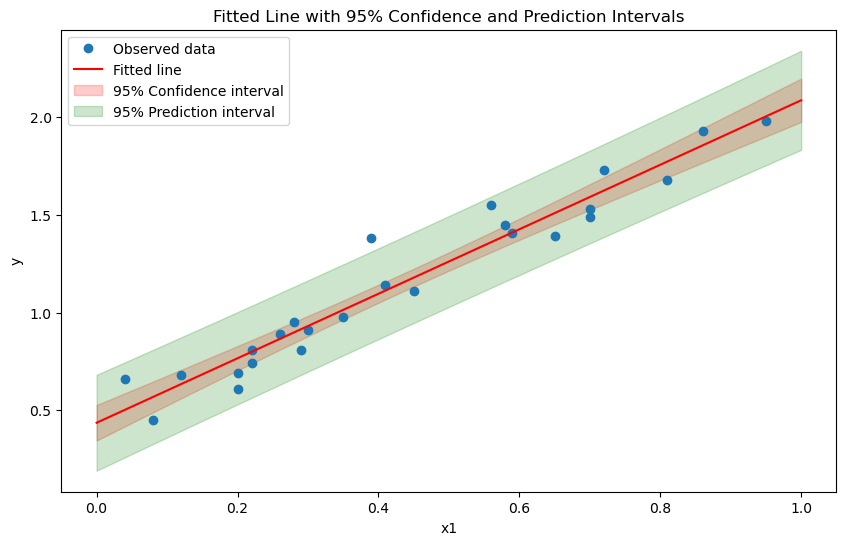

In [23]:
x1_new = pd.DataFrame({'x1': np.linspace(0, 1, 100)})

prediction_summary = fit.get_prediction(x1_new).summary_frame(alpha=0.05)

plt.figure(figsize=(10, 6))

plt.plot(df['x1'], df['y'], 'o', label='Observed data')


plt.plot(x1_new, prediction_summary['mean'], 'r-', label='Fitted line')

plt.fill_between(x1_new['x1'], prediction_summary['mean_ci_lower'], prediction_summary['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence interval')

plt.fill_between(x1_new['x1'], prediction_summary['obs_ci_lower'], prediction_summary['obs_ci_upper'], color='green', alpha=0.2, label='95% Prediction interval')

plt.xlabel('x1')

plt.ylabel('y')

plt.legend()

plt.title('Fitted Line with 95% Confidence and Prediction Intervals')

plt.show()